In [2]:
# Подключение библиотек
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 8, 6

In [ ]:
np.array([7, 8])

<h2 style="color:black" align="center">2. Сравнение средних</h2>
<h2 style="color:#008B8B">2.1 T-распределение</h2>

Создадим нормальное распределение

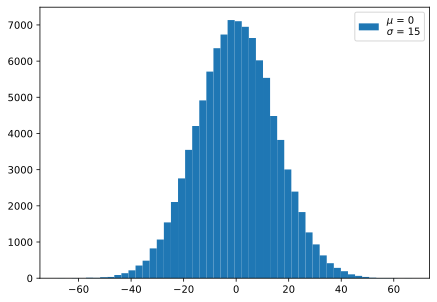

In [256]:
mu, sigma = 0, 15
s = np.random.normal(mu, sigma, 100000)

plt.hist(s, bins=50, label = f'$\mu$ = {mu} \n$\sigma$ = {sigma}')
plt.legend()
plt.show()

**Вспоминаем ЦП**
Мы познакомились с основной идеей статистической проверки гипотез. Основываясь на ЦП мы могли бы предположить, как бы вели себя все выборочные средние, если бы мы многократно повторяли наш эксперемент и основываясь на этой информации рассчитать вероятность получить такое или ещё более выраженное отклонение, чем в нашем исследовании.

Ещё раз обратимся к ЦП теореме. Если мы знаем, что в нашей ГС $\mu = 0$ и $\sigma = 1$ и мы многократно извлекаем выборки из нашей ГС, то все средние значения этих выборок распределятся нормальныи образом вокруг среднего ГС ($\mu$) и со стандартныи отклонением (стандартная ошибка среднего) этого распределения, которую можно рассчитать по следующей формуле:

$se = \frac{\sigma}{n}$

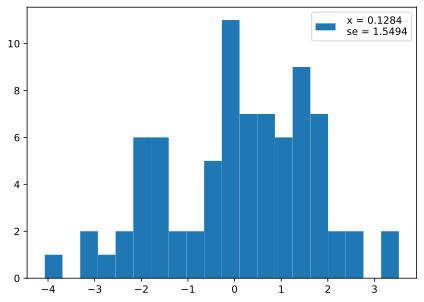

In [316]:
# Создаём выборку
ch = np.random.choice(s, (80, 100))

# Рассчитываем среднее всех выборок
result = []
for i in ch:
    result.append(i.mean())
    
result = np.array(result)

plt.hist(result, bins=20, label = f' x = {result.mean():.4f} \n se = {result.std():.4f}')
plt.legend()

plt.show()

In [317]:
se = sigma / sqrt(100)
print(se)

1.5


In [318]:
result.std()

1.5494206371908459

In [325]:
test = np.random.choice(s, 100)
se = test.std() / sqrt(100)
print(se)

1.5969294078318472


Когда у нас большое количество наблюдений, стандартное отклонение ($sd$) по выборке хорошо описывет соответствующий параметр ГС ($\sigma$), что позволяет нам преобразовать формулу стандартной ошибки среднего $se$ преобразовать в следющий вид для выборки:

$se = \frac{sd}{n}$

**Что если число наблюдений в выборке оказется небольшим?**
И при большом количестве наблюдений все выборочные средние будут вести себя в соответствии с нормальный распределением. Однако, когда количество наблюдей становится небольшим, особенно когда число наблюдений меньше 30. В этом случае стандартное отклонение по выборке не является хорошим показателем соответствующего параметра ГС ($\sigma$), так как он начинает больше отклоняется от него. Например, в такой ситуцации стандартное отклонение может быть равно $1.53$, когда в ГС стандартное отклонение равно 1. А что более важно, что нарушается предположение о том, что все выборочные средние будут вести себя в соответствии с нормальным законом (ЦП).

Причиной таких последствий является маленький объём выборки из-за чего она может оказаться в разных частях распределения, что и смещает все параметры. То есть, чем меньше объём нашей выборки, тем более сильные отклонения от среднего ГС мы будем получать.

**Распределение Стьюдента**

Если число наблюдений невелико и $\sigma$ неизвестно (почти всегда), используется распределение Стьюдента (t-distribution).

In [153]:
ch = np.random.choice(s, (10, 100))
# plt.hist(ch, bins=10)
# plt.show()


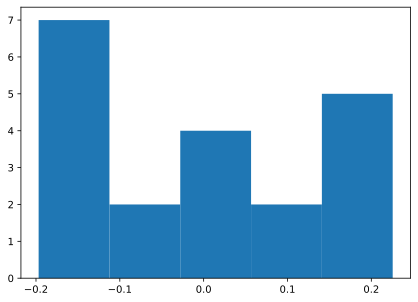